## Analyzing the Effects of Top/Bottom Coding on The Accuracy of Global LGBM Forecasts

***

## Import Modules

In [1]:
# general modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# light gradient boosting model package
import lightgbm as lgb

##### the `helper_functions.py` file contains many custom functions we wrote to aid in our analysis
##### `full_coding_analysis` combines all of the following - train-test split data,
##### data protection, train models, compare accuracies, return accuracy results
from helper_functions import full_coding_analysis
from helper_functions import *

# import detrender and deseasonalizer
from sktime.transformations.series.detrend import Detrender
# nice time series plots
from sktime.utils.plotting import plot_series

## Import data

In [2]:
# import weekly finance time series
Y = np.genfromtxt("../../Data/Train/Clean/weekly_finance_clean.csv", delimiter = ',', skip_header = 1)
Y = pd.DataFrame(Y)

***

We obtain results for a combination of forecast horizons, coding types (top and bottom), coding percentages, and model complexities:

* Forecast Horizons: (1, 5, 15)
* Coding Types: (Top, Bottom)
* Coding Percentages: (0.10, 0.20, 0.40)
* Model complexities (window length): (10, 20, 40)

## Simple Model (window length = 10)

In [3]:
forecaster = lgb.LGBMRegressor()
window_length = 10

In [4]:
results_dict_10 = {}
fcasts_10 = {}
fcasts_protected_10 = {}
tests = {}
types = ["Top", "Bottom"]
percentages = [0.10, 0.20, 0.40]
horizons = [1, 20]

In [5]:
for t in types:
    for p in percentages:
        for h in horizons:
            idx = "h="+str(h)+", "+t+" "+str(p)
            results_dict_10[idx], tests[idx], fcasts_10[idx], fcasts_protected_10[idx] = full_coding_analysis(time_series_data=Y,
                                                                                                              forecasting_model=forecaster,
                                                                                                              forecast_horizon=h, 
                                                                                                              coding_type=t, 
                                                                                                              coding_percentage=p, 
                                                                                                              window_length=window_length)

In [6]:
results_dict_10

{'h=1, Top 0.1': {'Mean Accuracies': array([3.12, 3.12]),
  'Protected Mean Accuracies:': array([4.71, 4.71]),
  '% Change Mean accuracy:': array([-51.04, -51.04]),
  '% Change Median accuracy:': array([-153.1, -153.1]),
  '% Forecasted Points adjusted downward:': 55.489999999999995,
  '% Forecasted Points adjusted upward:': 44.51,
  '% Series with improved accuracy:': array([31.1, 31.1]),
  '% Series with reduced accuracy:': array([68.9, 68.9]),
  'Original Mean Absolute Error Upward Adjusted:': 4.52,
  'Original Mean Absolute Error Downward Adjusted:': 2.0,
  'Protected Mean Absolute Error Upward Adjusted:': 4.3999999999999995,
  'Protected Mean Absolute Error Downward Adjusted:': 4.97},
 'h=20, Top 0.1': {'Mean Accuracies': array([5.1 , 6.08]),
  'Protected Mean Accuracies:': array([5.87, 6.8 ]),
  '% Change Mean accuracy:': array([-14.96, -11.75]),
  '% Change Median accuracy:': array([-17.48, -13.17]),
  '% Forecasted Points adjusted downward:': 69.45,
  '% Forecasted Points adjus

In [7]:
# plot the accuracy changes for a given scenario
fcasts = fcasts_10["h=20, Bottom 0.1"]
fcasts_protected = fcasts_protected_10["h=20, Bottom 0.1"]
Test = tests["h=20, Bottom 0.1"]

In [8]:
maes_orig = mean_absolute_error(Test, fcasts, multioutput="raw_values")
maes_protected = mean_absolute_error(Test, fcasts_protected, multioutput="raw_values")
rmses_orig = mean_squared_error(Test, fcasts, square_root=True, multioutput="raw_values")
rmses_protected = mean_squared_error(Test, fcasts_protected, square_root=True, multioutput="raw_values")

In [9]:
pct_maes = (maes_orig-maes_protected)/maes_orig
pct_rmses = (rmses_orig-rmses_protected)/rmses_orig

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  0.,  1.,  2.,  4.,  5.,
         8., 23., 64., 30., 16.,  2.,  2.]),
 array([-3.04445386, -2.84904396, -2.65363406, -2.45822416, -2.26281425,
        -2.06740435, -1.87199445, -1.67658455, -1.48117464, -1.28576474,
        -1.09035484, -0.89494494, -0.69953504, -0.50412513, -0.30871523,
        -0.11330533,  0.08210457,  0.27751447,  0.47292438,  0.66833428,
         0.86374418]),
 <BarContainer object of 20 artists>)

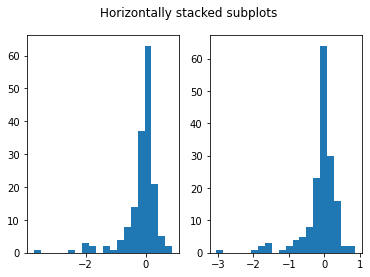

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.hist(pct_maes, bins=20)
ax2.hist(pct_rmses, bins=20)

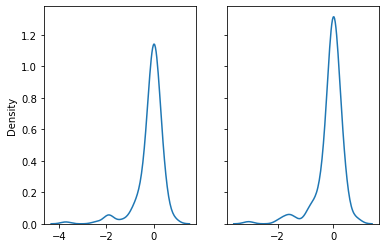

In [11]:
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.kdeplot(x=pct_maes, ax=ax1)
sns.kdeplot(x=pct_rmses, ax=ax2)
plt.show()

***
***

## 'Medium' Model (window length = 20)

In [12]:
forecaster = lgb.LGBMRegressor()
window_length = 20

In [13]:
results_dict_20 = {}
fcasts_20 = {}
fcasts_protected_20 = {}
tests = {}
types = ["Top", "Bottom"]
percentages = [0.10, 0.20, 0.40]
horizons = [1, 20]

In [14]:
for t in types:
    for p in percentages:
        for h in horizons:
            idx = "h="+str(h)+", "+t+" "+str(p)
            results_dict_20[idx], tests[idx], fcasts_20[idx], fcasts_protected_20[idx] = full_coding_analysis(time_series_data=Y,
                                                                                                              forecasting_model=forecaster,
                                                                                                              forecast_horizon=h, 
                                                                                                              coding_type=t, 
                                                                                                              coding_percentage=p, 
                                                                                                              window_length=window_length)

In [15]:
results_dict_20

{'h=1, Top 0.1': {'Mean Accuracies': array([3.05, 3.05]),
  'Protected Mean Accuracies:': array([4.58, 4.58]),
  '% Change Mean accuracy:': array([-50.01, -50.01]),
  '% Change Median accuracy:': array([-126.92, -126.92]),
  '% Forecasted Points adjusted downward:': 54.879999999999995,
  '% Forecasted Points adjusted upward:': 45.12,
  '% Series with improved accuracy:': array([33.54, 33.54]),
  '% Series with reduced accuracy:': array([66.46, 66.46]),
  'Original Mean Absolute Error Upward Adjusted:': 4.42,
  'Original Mean Absolute Error Downward Adjusted:': 1.92,
  'Protected Mean Absolute Error Upward Adjusted:': 4.31,
  'Protected Mean Absolute Error Downward Adjusted:': 4.8},
 'h=20, Top 0.1': {'Mean Accuracies': array([5.49, 6.49]),
  'Protected Mean Accuracies:': array([6.35, 7.36]),
  '% Change Mean accuracy:': array([-15.83, -13.36]),
  '% Change Median accuracy:': array([-12.88, -12.91]),
  '% Forecasted Points adjusted downward:': 67.86999999999999,
  '% Forecasted Points a

***
***

## More Complex Model (window length = 40)

In [16]:
forecaster = lgb.LGBMRegressor()
window_length = 40

In [17]:
results_dict_40 = {}
fcasts_40 = {}
fcasts_protected_40 = {}
tests = {}
types = ["Top", "Bottom"]
percentages = [0.10, 0.20, 0.40]
horizons = [1, 20]

In [18]:
for t in types:
    for p in percentages:
        for h in horizons:
            idx = "h="+str(h)+", "+t+" "+str(p)
            results_dict_40[idx], tests[idx], fcasts_40[idx], fcasts_protected_40[idx] = full_coding_analysis(time_series_data=Y,
                                                                                                              forecasting_model=forecaster,
                                                                                                              forecast_horizon=h, 
                                                                                                              coding_type=t, 
                                                                                                              coding_percentage=p, 
                                                                                                              window_length=window_length)

In [19]:
results_dict_40

{'h=1, Top 0.1': {'Mean Accuracies': array([2.79, 2.79]),
  'Protected Mean Accuracies:': array([4.52, 4.52]),
  '% Change Mean accuracy:': array([-62.12, -62.12]),
  '% Change Median accuracy:': array([-165.05, -165.05]),
  '% Forecasted Points adjusted downward:': 62.2,
  '% Forecasted Points adjusted upward:': 37.8,
  '% Series with improved accuracy:': array([30.49, 30.49]),
  '% Series with reduced accuracy:': array([69.51, 69.51]),
  'Original Mean Absolute Error Upward Adjusted:': 4.19,
  'Original Mean Absolute Error Downward Adjusted:': 1.94,
  'Protected Mean Absolute Error Upward Adjusted:': 4.12,
  'Protected Mean Absolute Error Downward Adjusted:': 4.760000000000001},
 'h=20, Top 0.1': {'Mean Accuracies': array([7.01, 8.01]),
  'Protected Mean Accuracies:': array([7.47, 8.44]),
  '% Change Mean accuracy:': array([-6.55, -5.29]),
  '% Change Median accuracy:': array([-11.73,  -6.94]),
  '% Forecasted Points adjusted downward:': 69.36,
  '% Forecasted Points adjusted upward: